<a href="https://colab.research.google.com/github/chrisfeltner/feltner-cop4630/blob/master/HW4/Homework4ChristopherFeltner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 4
##Christopher Feltner

#Part 1: General Concepts

##Artificial Intelligence
###"The science and technology of making intelligent machines"
###A branch of computer science dealing with the simulation of intelligent behavior in computers

Symbolic AI or GOFAI is a collection of AI methods which use high-level, manual representation of problems and logic. It is therefore heavily reliant on human intervention.



##Machine Learning
###A subset of AI
Machine learning programs adjust themselves in response to data they have been exposed to. It is dynamic and does not require human intervention to learn, making it less reliant on human experts.

##Deep Learning
###A subset of machine learning
Machine learning models with numerous hidden layers are used, with different layers learning different features of the data. This produces more accurate predictions from the data and allows the model to solve more difficult problems.

##Types of Machine Learning
###Supervised Learning
The model is provided with data which has been labelled (presumably by humans). The labelled data is then used during training of the model.
###Unsupervised Learning
The model is provided with an unlabelled dataset. The goal of the model is to identify meaningful patterns in the data. Because the data is unlabelled, the model must infer its own rules for categorizing the data.
###Reinforcement Learning
In reinforcement learning, the model is provided a means to interact with an environment (i.e. a game, a virtual environment) to produce data. A negative or positive incentive is applied to undesireable or desireable behavior (i.e. a negative incentive is applied to the model getting a game over screen in a videogame). The agent then learns to take action to maximize its reward.

##ML Terminology
*   label -- what we wish for the model to predict
*   feature -- an input variable
*   example -- a particular instance of data
*   training -- showing the model labelled examples in hopes that the model will learn the relationships between features and labels
*   inference -- applying the trained model to unlabeled examples
*   regression model -- a model which predicts continuous values
*   classification model -- predicts discrete values
*   loss -- a numerical measure of how bad a model's prediction was on an example
*   Mean Squared Error (MSE) -- average squared loss for the entire dataset






#Part 2: Building a Model

###Neuron Structure
Neurons take in the values of previous neurons connected to it multiplied by their weights as input, sums them, adds a bias, and then passes this result through an activation function as output.
###Activation Functions
The purpose of an activation function is to scale the output of a neuron to a value between 0 and 1
####Sigmoid
Sigmoid is often used for binary classification
\begin{equation}
\sigma = \frac{1}{1+e^{-x}}
\end{equation}

####Tanh
\begin{equation}
\tanh{x}
\end{equation}

####ReLU
ReLU is often used in hidden layers
\begin{equation}
\max(0, x)
\end{equation}

####Leaky ReLU
\begin{equation}
\max(0.1x,x)
\end{equation}

####Softmax
An activation function used for classifying into non-binary categories, which outputs a probability distribution




###Sequential Neural Network with Dense Layers
Each neuron in a layer are connected to each neuron in the next layer. Each neuron after the first layer recieves as input all outputs from every neuron in the previous layer.


In [0]:
from keras.model import Sequential
model = Sequential();
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

###Convolutional Neural Network
A convolutional neural network is used to classify images. A convnet is structured in two parts: a network of convolutional and pooling layers which learn the features of images, and a fully connected network to classify images based on the output of the convolutional layers.

###Feature Network
####Convolutional Layers
In a convolutional layer, feature maps slide over the image horizontally and vertically one pixel at a time and the convolution operation is used, which produces a new output feature map. During training, the CNN learns the optimal values for the feature maps to extract meaningful features from the images.
####Pooling Layers
Pooling layers are used to downsample feature maps while retaining feature information. Typically, maxpooling is used, where the maximum value of the feature map is output to a new feature map and the remaining values are discarded.

###Fully Connected Network
The fully connected network takes in the flattened feature vector from the convolutional network as input and classifies the image.

###Keras Convnet Example

In [0]:
model = Sequential()
#Convolutional Part
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(1, 28, 28)))
model.add(Conv2D(64, activation='relu'))
model.add(MaxPooling(pool_size=(2, 2)))
#Fully Connected Part
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Part 3: Compiling a Model

##Optimization
Optimizers updates the model in response to the results of the loss function. A machine learning model is initialized with random values for the weights and biases. The optimizer is the function used to update the weights and biases during training in order to produce better results, in an effort to find the weights and biases which produce the lowest possible loss
###Gradient Descent
Gradient Descent is an optimizer. With each time step, the model's weights are adjusted in the direction of their negative gradient. The adjustment size is the learning rate.
###Stochastic Gradient Descent
Wheras in Gradient Descent, where all training examples are used for each training step, in the SGD optimizer only a subset of the training examples are used, which is defined by the batch size, in order to produce training results faster.
##Compilation Parameters Used in Training
###Hyperparameters
Hyperparameters are parameters which are set before training that can be used to tune the model during training. They are usually set manually by the engineer. Learning rate is an example of a hyperparameter.
###Learning Rate
The learning rate is the amount that the model's weights are changed at each time step. If the learning rate is too large, the model could diverge and never end up finding a local minimum of the loss function. If the learning rate is too small, the model will take too long to train and will not be able to find a local minimum of the loss because it is training too slowly.
###Loss Function
The function which defines how well the model is performing. It is used during training to adjust the weights. Commonly used losses include Mean Squared Error and Categorical Crossentropy.
###Regularization
The goal of regularization is to prevent overfitting. Part of the loss function penalizes large weight values, even if the prediction is correct. This helps the model to generalize better.




##Compiling a Model
This model will train using Mean Squared Error as the loss function, a learning rate of 0.01, and Stochastic Gradient Descent as the optimizer.

In [0]:
model.compile(loss=losses.mean_squared_error, lr=0.01, optimizer='sgd')

#Part 4: Training
Training is the process where the model is exposed to the training data in an effort to find optimal values for the weights/biases/filters

##Overfitting
When a model learns features which are too specific to the training data and is unable to generalize well to testing data. Training loss/accuracy continues to increase but validation loss/accuracy fails to improve. This happens when a model is too complex for the training data. Having too many training epochs can also cause the model to overfit.

###Overfitting Model

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 79us/sample - loss: 1.1575 - acc: 0.7882 - val_loss: 0.5025 - val_acc: 0.8242
Epoch 2/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4602 - acc: 0.8376 - val_loss: 0.6033 - val_acc: 0.7886
Epoch 3/30
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4208 - acc: 0.8509 - val_loss: 0.4127 - val_acc: 0.8516
Epoch 4/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3905 - acc: 0.8605 - val_loss: 0.4240 - val_acc: 0.8540
Epoch 5/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3716 - acc: 0.8688 - val_loss: 0.4358 - val_acc: 0.8505
Epoch 6/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3546 - acc: 0.8745 - val_loss: 0.4059 - val_acc: 0.8548
Epoch 7/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3489 - acc: 0.8763 - val_loss: 0.

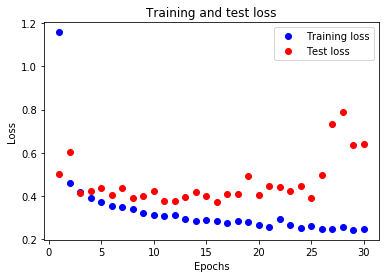

In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Underfitting
A model is too simple and is unable to describe the data, or was not trained in such a way that it learns the optimal weights. This can happen when there are too few trainable parameters to describe the number of features in the data or when there are too few training epochs.

##Ways of Fighting Overfitting
###Dropout
Dropout ignores a certain percentage of neurons, chosen at random, in a forwards or backwards pass, meaning that other neurons will need to "pick up the slack" and learn some of the features known by the dropped out neurons. This prevents some neurons from gaining too much power in the prediction, and develops co-dependency among the neurons.

In [0]:
model = Sequential()
model.add(Dense(10, activation='relu'))
#Dropout 50% of neurons
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

###Data Augmentation
Another way of fighting overfitting is to add more training and validation data. A way of simulating new data without actually collecting new data is to use data augmentation: slightly altering data without changing the features. For example, in image data, a researcher could crop, horizontally flip, or pad the images.

#Part 5: Finetuning a Trained Model
A pretrained model can be used as a base for a classifier of a set of classes different than the original model was trained for. This is because complex models, such as NASNet or InceptionV3, extract features which are common to most images and generalize well in their top layers. To make this new model, we add a new classifier to the end of the pretraiend model. Fine tuning requires two stages. In the first, we train a the combined model, but freeze the layers of the base model in order to train the classifier. Next, we unfreeze some of the layers near the end of the base model and train them in conjunction with the classifier in order to extract features specific to the new classes.

##Freezing
Freezing a layer means to prevent it from training. Here is how we can freeze a layer in Keras:

In [0]:
for layer in model.layers[:249]:
   layer.trainable = False

##Fine Tuning: Part One
We add a classifier (implemented as a fully connected layer) to the end of our base model. Then, we freeze the layers in our base model, only training our classifier on the results of the original base model using the new data with ten classes.

In [0]:
base_model = InceptionV3(weights='imagenet', include_top=False)
model = Sequential()
model.add(base_model)
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
#Freeze base model
base_model.trainable=False

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop())


##Fine Tuning: Part Two
Now that our classifier has been trained on the output from the base model, we unfreeze some of the base model's layers and train it jointly with the classifier.

In [0]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop())